Downloading the dataset 

In [2]:
!wget https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part1.tar.gz
!wget https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part2.tar.gz
!tar -xzf GroceryDataset_part1.tar.gz
!tar -xzf GroceryDataset_part2.tar.gz

!rm -r *.tar.gz


Redirecting output to ‘wget-log’.

Redirecting output to ‘wget-log.1’.


1) Getting the annotation files from the grocery dataset


```
generate_label_BI() 
# creates the training set from brand images 

ret_shape()
# returns the image shape

brand_annotation()
# cretes a dictionary of annotation boxes from annotation.txt

image_resize() 
# to resize the image

```



In [3]:
!wget https://raw.githubusercontent.com/gulvarol/grocerydataset/master/annotation.txt
  

import numpy as np
import os
import scipy.misc as misc
import random
import tensorflow as tf
import numpy as np
import scipy.misc as misc
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import time 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import glob
import matplotlib.pyplot as plt
from skimage.draw import polygon
import scipy.misc as misc
import random
import os


def generate_label_BI():
    path = "./BrandImages/"
    input_img = []
    label = []
    for i in range(1,11):
        directory = path+str(i)+"/*.jpg"
        file_list = glob.glob(directory)
        print(str(i)+"...")
        for j in file_list:
            name = j.split("/")[-1][0:-4]
            img = cv2.imread(j)
            # Sy,Sx,Depth=img.shape
            #label[name] = i
            # Resizing the image and creating the label accordingly
            new_img = image_resize(img,100,200)
            input_img.append(new_img)
            label.append(int(i))
            # name the labels 
            #label = np.ones((img.shape[0],img.shape[1],1), dtype=int)
            #if(i!=1):
                #label = np.multiply(label,i)
            #cv2.imwrite("./data/label/"+name+".png",label)
            #cv2.imwrite("./data/input/"+name+".jpg",img)
    return input_img,label
            
def ret_shape(path):
    img = cv2.imread(path)
    return img.shape
  
def brand_annotation():
    b_annotation = dict()
    path = "./BrandImagesFromShelves/"
    path_2 = "./ShelfImages/"
    for i in range(1,11):
        print(str(i)+"..")
        fld_path = path+str(i)+"/"
        list_val = os.listdir(fld_path)
        for j in list_val:
            name = j.split(".")[0]+".JPG"
            a = ret_shape(fld_path+j)
            x = j.split(".")[1].split("_")
            x[0] = str(i)
            x[4] = str(a[0])
            #x = np.asarray(x, dtype=int)
            if name in b_annotation.keys():  
                b_annotation[name].append(x)  
            else:  
                b_annotation[name] =  [x]  
    return b_annotation
def image_resize(Img, Sy, Sx):
  '''if(Sy>2000 and Sy<3500):
    f2 =2.5
  elif(Sy>=3500):
    f2 = 2.8
  else:
    f2 = 2
  
  if(Sx>2000 and Sx<3500):
    f1 =2.5
  elif(Sx>=3500):
    f1 = 2.8
  else:
    f1 = 2
  '''
  new_Img = cv2.resize(Img, (Sx,Sy), interpolation = cv2.INTER_LINEAR)
  
  #interpolation = cv2.INTER_CUBIC
  #print(new_Img.shape)
  return new_Img




Redirecting output to ‘wget-log.2’.


In [4]:
x_train = []
y_train = []
x_train,y_train = generate_label_BI()

1...
2...
3...
4...
5...
6...
7...
8...
9...
10...


In [6]:
np.array(x_train).shape

(3701, 100, 200, 3)

```
generate_label_SI_new()
# generates the few training images the shelf images which doesnot have the 10 brand images to be under background class and keeps the rest for testing in test_list
```

In [0]:
def generate_label_SI_new(annotation,full_annotation,inp_list, label):
    path = "./ShelfImages/"
    count = 0
    total = 0
    num = 0
    flag =1
    empty_list = []
    test_list = []
    
    
    file_list = [each for each in os.listdir(path) if each.endswith('.JPG')]
    for j in file_list:
        num = num+1
        name = j
        # print(name)
        
        # label = np.zeros((img.shape[0],img.shape[1]), dtype=int)
        if name in annotation.keys():
            # not used here
            test_list.append(name)
        else:
            img = cv2.imread(path+j)
            empty_list.append(name)
            #temp_list = dict()
            if(flag == 1):
              print("updating training images ss")
              inp_list, label = crop_ss_train(img,inp_list, label,0.3,5000,9000, 240,200)
              flag = 2
            else:
              if(count%5==0):
                  b_ann = full_annotation[name]
                  print("updating training images crop")
                  inp_list, label, num = crop_image_new(name,img,b_ann, inp_list, label)
                  total = total +num+1
                  
              else:
                  test_list.append(name)
            count+=1
    print("Total:")
    print(total)
    return inp_list, label,empty_list, test_list




This is for cropping the selective search window and resizing the cropped image to a size 100x200x3



In [0]:
def crop_image_new(name,img,box_list,inp_list, label):
    #img = cv2.imread("../input/grocerydataset/grocerydataset_part1/ShelfImages/"+name)
    count=1
    flag = 11
    for i in box_list:
        n = np.asarray(i,dtype=int)
        sample = img[n[1]:n[1]+140,n[0]:n[2]+n[0],:]
        if flag <=10:
          plt.imshow(sample)
          plt.show()
          flag += 1
        new_img = image_resize(sample,100,200)
        inp_list.append(new_img)
        label.append(int(i[4]))
        if(int(i[4])>0):
          print("ERROR")
        
        count+=1
    return inp_list, label, count
  
def crop_image_full(name,img,box_list):
    #img = cv2.imread("../input/grocerydataset/grocerydataset_part1/ShelfImages/"+name)
    count=1

    for i in box_list:
        n = np.asarray(i,dtype=int)
        sample = img[n[1]:n[1]+130,n[0]:n[2]+n[0],:]
        label = int(i[4]) 
        plt.imshow(sample)
        plt.show()
        count+=1
    return count

I using the selective search algorithm by 

Applying the selective search on image that is resizes to half of the original size of the actual image, as the selective search algorithm is highly time consuming

Out of the regions predicted from the SS algorithm i'm only considering the regions with 5000< region area <10000 with width>90 and hieght >90

Finally supressing the boxes with overlap area > 0.3

In [7]:
!pip install selectivesearch
import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch


def crop_ss_train(img,inp_list, label,OVERLAP,min_value,max_value, m_w,m_h):

    # loading astronaut image
    #img = cv2.imread("./ShelfImages/"+file_list[0])
    '''k = 1000
    newHeight = k
    newWidth = int(img.shape[1]*k/img.shape[0])
    img = cv2.resize(img, (newWidth, newHeight))
    '''
    # perform selective search
    img_lbl, regions = selectivesearch.selective_search(img, scale=1, sigma=0.8, min_size=500)

    candidates = set()
    for r in regions:
        # excluding same rectangle (with different segments)
        if r['rect'] in candidates:
            continue
        # excluding regions smaller than 2000 pixels
        if r['size'] < min_value and r['size'] < max_value:
            continue
        
        # distorted rects
        x, y, w, h = r['rect']
        if w < 90 or h < 90:
          continue
        if w > m_w or h > m_h:
          continue
        candidates.add(r['rect'])
        
    boxes = []
    # draw rectangles on the original image
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    ax.imshow(img)
    for x, y, w, h in candidates:
        boxes.append([x, y, x+w, y+h])
        rect = mpatches.Rectangle(
            (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)

    plt.show()
    boxes = np.array(boxes)
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
    pick = []
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],np.where(overlap > OVERLAP)[0])))
    fig, bx = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    bx.imshow(img)
    bx.grid(False)
    new = boxes[pick] 
    flag = 11
    for i in new:
        #boxes.append([x, y, x+w, y+h])
        sample = img[i[1]:i[3],i[0]:i[2],:]
        if flag <= 10:
          plt.imshow(sample)
          plt.show()
          flag += 1 
        new_img = image_resize(sample,100,200)
        inp_list.append(new_img)
        label.append(0)
        
        rect = mpatches.Rectangle(
            (i[0], i[1]), i[2]-i[0], i[3]-i[1], fill=False, edgecolor='red', linewidth=1)
        bx.add_patch(rect)
    return inp_list, label
    

  Running setup.py bdist_wheel for selectivesearch ... - done
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


reading the brand annotationfrom shelves for additional information 

this is stored as a dictionary

In [8]:
file = open("./annotation.txt", "r") 
x = file.readlines()
x = [l.strip() for l in x]

full_dictionary = dict()
for i in x:
    vector = i.split(" ")
    name = vector[0]
    item = int(vector[1])
    c_list = []
    
    for itr in range(0,item):
            pos = 2 + itr*5 
            test_list = vector[pos:pos+5]
            c_list.append(test_list)
    full_dictionary[name] =c_list

def brand_annotation():
    b_annotation = dict()
    path = "./BrandImagesFromShelves/"
    path_2 = "./ShelfImages/"
    for i in range(1,11):
        print(str(i)+"..")
        fld_path = path+str(i)+"/"
        list_val = os.listdir(fld_path)
        for j in list_val:
            name = j.split(".")[0]+".JPG"
            a = ret_shape(fld_path+j)
            x = j.split(".")[1].split("_")
            x[0] = str(i)
            x[4] = str(a[0])
            #x = np.asarray(x, dtype=int)
            if name in b_annotation.keys():  
                b_annotation[name].append(x)  
            else:  
                b_annotation[name] =  [x]  
    return b_annotation

annotation = brand_annotation()

1..
2..
3..
4..
5..
6..
7..
8..
9..
10..


updating training images ss


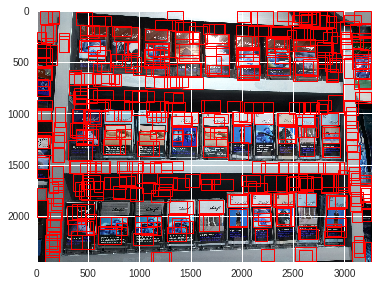

updating training images crop
updating training images crop
updating training images crop
updating training images crop
updating training images crop
updating training images crop
updating training images crop
updating training images crop
updating training images crop
updating training images crop
updating training images crop
Total:
350


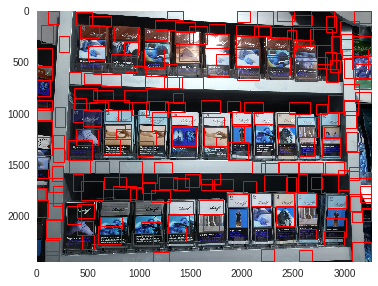

In [9]:
X, Y,empty_list, test_list = generate_label_SI_new(annotation,full_dictionary,x_train, y_train)

In [10]:
np.array(X).shape


(4237, 100, 200, 3)

In [11]:
X_train = np.array(X,dtype = 'float32')
Y_train = np.array(Y,dtype = 'float32')

print(X_train.shape)
print(Y_train.shape)

(4237, 100, 200, 3)
(4237,)


In [0]:
X_train[:,:,:,0] -= 103.939
X_train[:,:,:,1] -= 116.779
X_train[:,:,:,2] -= 123.68

In [13]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.05, random_state=42)
print(train_X.shape)
print(test_X.shape)

(4025, 100, 200, 3)
(212, 100, 200, 3)


Using TensorFlow backend.


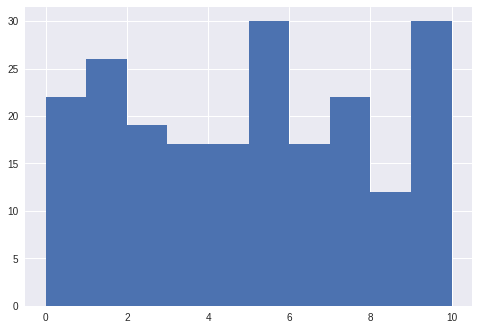

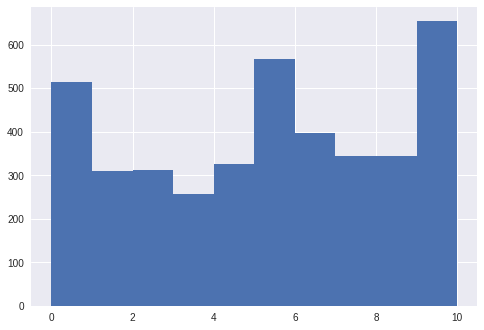

(4025, 11)
(212, 11)


In [14]:
from keras.utils import to_categorical

plt.hist(test_y)
plt.show()
test_Y = to_categorical(test_y, num_classes=11)

plt.hist(train_y)
plt.show()
train_Y = to_categorical(train_y, num_classes=11)

'''plt.imshow(test_X[10])
plt.show()

plt.imshow(train_X[10])
plt.show()'''

print(train_Y.shape)
print(test_Y.shape)


In [0]:
from sklearn import datasets, svm, metrics


In [16]:

from keras.layers import Input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Flatten
from keras import backend as K

input_tensor = Input(shape=(100, 200, 3))  # this assumes K.image_data_format() == 'channels_last'

base_model1 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor, pooling=None)
x = base_model1.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dense(100, activation='relu')(x)

predictions = Dense(11, activation='softmax')(x)


model = Model(inputs=base_model1.input, outputs=predictions)

for layer in base_model1.layers:
    layer.trainable = False
    
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])

58892288/58889256 [==============================] - 4s 0us/step


In [18]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 100, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 100, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 100, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 50, 128)       0         
__________

In [48]:
model.fit(train_X, train_Y,
          epochs=10,
          batch_size=16,
          validation_data=(test_X, test_Y))

Train on 4025 samples, validate on 212 samples
Epoch 1/10
4025/4025 [==============================] - 23s 6ms/step - loss: 7.5504e-04 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 2/10
4025/4025 [==============================] - 23s 6ms/step - loss: 6.8933e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 3/10
4025/4025 [==============================] - 22s 6ms/step - loss: 6.3356e-04 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 4/10
4025/4025 [==============================] - 22s 6ms/step - loss: 5.8574e-04 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 5/10
4025/4025 [==============================] - 23s 6ms/step - loss: 5.4521e-04 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 6/10
4025/4025 [==============================] - 23s 6ms/step - loss: 5.0935e-04 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 7/10
4025/4025 [==============================] - 23s 6ms/step - loss: 4.7718e-04 - acc: 1.0000 - val_loss: 0.001

In [20]:
from sklearn import datasets, svm, metrics
y_pred = model.predict(test_X)

print("Classification report for classifier VGG16:\n%s\n"% (metrics.classification_report(np.argmax(test_Y,axis=1), np.argmax(y_pred,axis=1))))



Classification report for classifier VGG16:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        22
          1       1.00      1.00      1.00        26
          2       1.00      1.00      1.00        19
          3       1.00      1.00      1.00        17
          4       1.00      1.00      1.00        17
          5       1.00      1.00      1.00        30
          6       1.00      1.00      1.00        17
          7       1.00      1.00      1.00        22
          8       1.00      1.00      1.00        12
          9       1.00      1.00      1.00        17
         10       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00       212




In [0]:
def selective_search(img, SCALE = 1):
    #inp_list = []
    # label = []
    # loading astronaut image
    #img = cv2.imread("./ShelfImages/"+file_list[0])
    # k = 1000
    # newHeight = k
    # newWidth = int(img.shape[1]*k/img.shape[0])
    # img = cv2.resize(img, (newWidth, newHeight))
    # perform selective search
    img_lbl, regions = selectivesearch.selective_search(img, scale=SCALE, sigma=0.8, min_size=1000)
    return regions 

def crop_ss_test(img,regions,OVERLAP,min_value,max_value, m_w,m_h):
    inp_list = []
    label = []
    '''# loading astronaut image
    #img = cv2.imread("./ShelfImages/"+file_list[0])
    # k = 1000
    # newHeight = k
    # newWidth = int(img.shape[1]*k/img.shape[0])
    # img = cv2.resize(img, (newWidth, newHeight))
    # perform selective search
    img_lbl, regions = selectivesearch.selective_search(img, scale=1, sigma=0.8, min_size=1000)'''

    candidates = set()
    for r in regions:
        # excluding same rectangle (with different segments)
        if r['rect'] in candidates:
            continue
        # excluding regions smaller than 2000 pixels
        if r['size'] < min_value and r['size'] < max_value:
            continue
        
        # distorted rects
        x, y, w, h = r['rect']
        if w < 30 or h < 30:
          continue
        if w > m_w or h > m_h:
          continue
        candidates.add(r['rect'])
        
    boxes = []
    # draw rectangles on the original image
    '''fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    ax.imshow(img)'''
    for x, y, w, h in candidates:
        boxes.append([x, y, x+w, y+h])
        '''rect = mpatches.Rectangle(
            (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)'''

    plt.show()
    boxes = np.array(boxes)
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
    pick = []
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],np.where(overlap > OVERLAP)[0])))
    '''fig, bx = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    bx.imshow(img)
    bx.grid(False)'''
    new = boxes[pick] 
    for i in new:
        #boxes.append([x, y, x+w, y+h])
        sample = img[i[1]:i[3],i[0]:i[2],:]
        new_img = image_resize(sample,100,200)
        inp_list.append(new_img)
        #label.append(0)
        
        '''rect = mpatches.Rectangle(
            (i[0], i[1]), i[2]-i[0], i[3]-i[1], fill=False, edgecolor='red', linewidth=1)
        bx.add_patch(rect)'''
    return inp_list, new

C1_P11_N2_S4_1.JPG


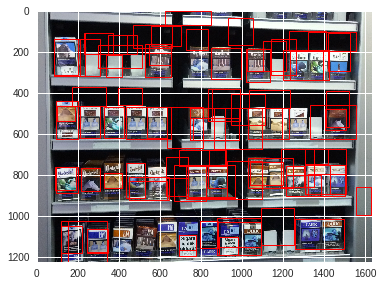

Time taken : 0.3924274722735087min


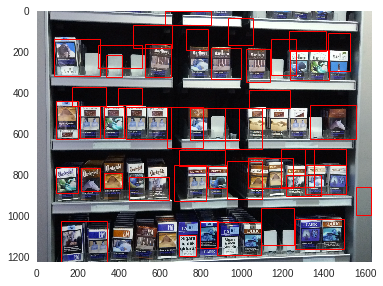

In [23]:
import time
for i in test_list[0:1]:
  #print(str(count)+'/'+str(len(test_list)))
  path = "./ShelfImages/"+i
  print(i)
  start=time.time()
  img = cv2.imread(path)
  # resize 
  img_2 = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
  region = selective_search(img)
  X_test, boxes = crop_ss_test(img,region,0.3,5000,10000,240,200)
  
  region = selective_search(img_2)
  X_test, boxes = crop_ss_test(img_2,region,0.3,5000,10000,240,200)
  
  end_t = (time.time()-start)/60
  print("Time taken : "+str(end_t)+"min")

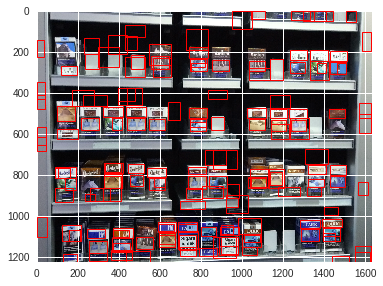

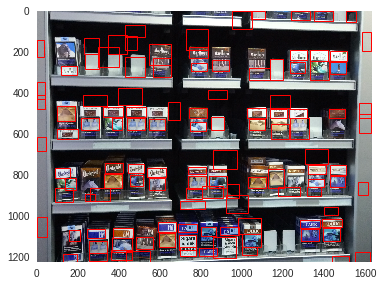

In [33]:
X_test, boxes = crop_ss_test(img_2,region,0.3,1500,6000,120,100)
pred = model.predict(np.array(X_test))
pred = np.argmax(pred,axis = 1)

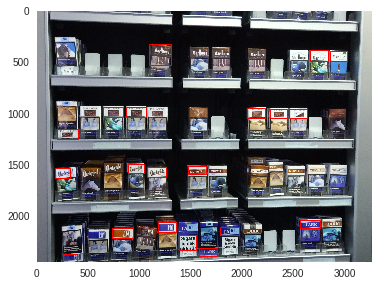

In [34]:
fig, bx = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
bx.imshow(img)
bx.grid(False)
boxes = np.array(boxes,dtype='int')
pred = np.array(pred,dtype='int')
new = boxes[pred>0] 
for i in new:
    i = np.multiply(i,2)
    #boxes.append([x, y, x+w, y+h])
    sample = img[i[1]:i[3],i[0]:i[2],:]
    #new_img = image_resize(sample,100,200)
    #inp_list.append(new_img)
    #label.append(0)

    rect = mpatches.Rectangle(
        (i[0], i[1]), i[2]-i[0], i[3]-i[1], fill=False, edgecolor='red', linewidth=1)
    bx.add_patch(rect)

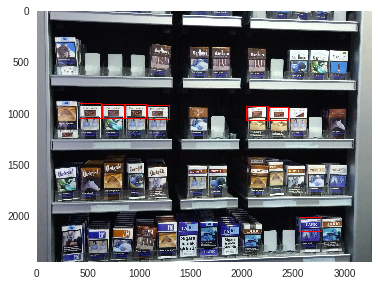

In [35]:
box_t = annotation["C1_P11_N2_S4_1.JPG"]

fig, bx = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
bx.imshow(img)
bx.grid(False)
#new = boxes2[pred>0] 
for j in box_t:
    i = np.array(j[1:5], dtype='int')
    #boxes.append([x, y, x+w, y+h])
    #sample = img[i[1]:i[3],i[0]:i[2],:]
    #new_img = image_resize(sample,100,200)
    #inp_list.append(new_img)
    #label.append(0)

    rect = mpatches.Rectangle(
        (i[0], i[1]), i[2], i[3], fill=False, edgecolor='red', linewidth=1)
    bx.add_patch(rect)

In [46]:

dpred_box = dict()
dclass_box = dict()
dregions=dict()
count = 1
average = 0.0
total = 0.0

for i in test_list:
  print(str(count)+'/'+str(len(test_list)))
  path = "./ShelfImages/"+i
  print(i)
  start=time.time()
  img = cv2.imread(path)
  # resize 
  img_2 = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
  region = selective_search(img_2)
  X_test, boxes = crop_ss_test(img_2,region,0.3,2000,5000,120,100)
  pred = model.predict(np.array(X_test))
  pred = np.argmax(pred,axis = 1)
  dpred_box[i] = boxes
  dclass_box[i] = pred
  dregions[i] = region
  count +=1
  end_t = (time.time()-start)/60
  total += end_t
  average = total/count;
  
  print("Time taken for this image: "+str(end_t)[0:5]+"min")
  print("Average Time :"+str(average)[0:5])
  print("Eta : "+str(average*(342-count)/60)[0:5]+"hrs" )

1/342
C1_P11_N2_S4_1.JPG
Time taken for this image: 0.383min
Average Time :0.191
Eta : 1.087hrs
2/342
C2_P01_N2_S3_2.JPG
Time taken for this image: 0.104min
Average Time :0.162
Eta : 0.919hrs
3/342
C3_P02_N1_S4_1.JPG
Time taken for this image: 0.332min
Average Time :0.205
Eta : 1.155hrs
4/342
C1_P08_N2_S4_2.JPG
Time taken for this image: 0.355min
Average Time :0.235
Eta : 1.321hrs
5/342
C2_P03_N1_S3_1.JPG
Time taken for this image: 0.139min
Average Time :0.219
Eta : 1.228hrs
6/342
C3_P02_N2_S4_1.JPG
Time taken for this image: 0.328min
Average Time :0.234
Eta : 1.311hrs
7/342
C2_P04_N3_S4_1.JPG
Time taken for this image: 0.153min
Average Time :0.224
Eta : 1.251hrs
8/342
C1_P05_N2_S4_2.JPG
Time taken for this image: 0.402min
Average Time :0.244
Eta : 1.357hrs
9/342
C1_P11_N1_S3_2.JPG
Time taken for this image: 0.297min
Average Time :0.249
Eta : 1.382hrs
10/342
C3_P05_N1_S4_1.JPG
Time taken for this image: 0.432min
Average Time :0.266
Eta : 1.469hrs
11/342
C2_P07_N1_S4_1.JPG
Time taken fo

In [0]:
np.array(X_test).shape
pred = model.predict(np.array(X_test))


In [1]:
!ls

sample_data


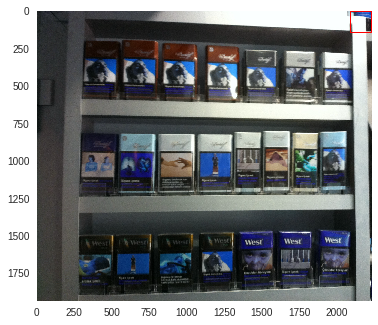

In [213]:
name ="C2_P03_N1_S3_1.JPG"
img = cv2.imread("./ShelfImages/"+name)
fig, bx = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
bx.imshow(img)
bx.grid(False)
boxes = np.array(dpred_box[name],dtype='int')
pred = np.array(dclass_box[name],dtype='int')
new = boxes[pred>0] 
for i in new:
    #boxes.append([x, y, x+w, y+h])
    sample = img[i[1]:i[3],i[0]:i[2],:]
    #new_img = image_resize(sample,100,200)
    #inp_list.append(new_img)
    #label.append(0)

    rect = mpatches.Rectangle(
        (i[0], i[1]), i[2]-i[0], i[3]-i[1], fill=False, edgecolor='red', linewidth=1)
    bx.add_patch(rect)

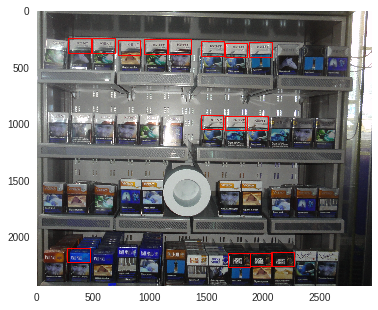

In [190]:
box_t = annotation[name]

fig, bx = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
bx.imshow(img)
bx.grid(False)
#new = boxes2[pred>0] 
for j in box_t:
    i = np.array(j[1:5], dtype='int')
    #boxes.append([x, y, x+w, y+h])
    #sample = img[i[1]:i[3],i[0]:i[2],:]
    #new_img = image_resize(sample,100,200)
    #inp_list.append(new_img)
    #label.append(0)

    rect = mpatches.Rectangle(
        (i[0], i[1]), i[2], i[3], fill=False, edgecolor='red', linewidth=1)
    bx.add_patch(rect)

In [41]:
name ="C1_P11_N2_S4_1.JPG"

boxes = np.array(dpred_box[name],dtype='int')
pred = np.array(dclass_box[name],dtype='int')

def pred_util(pred, boxes, scale = 1):
  pred_boxes = []
  pred_class = []
  pred_box_area = []
  count = 0
  for i in pred:
    if(i>0):
      new = np.multiply(boxes[count],scale)
      pred_box = np.zeros((4,),dtype='int')
      pred_class.append(i)
      pred_box=new
      pred_box_area.append((new[2]-new[0])*(new[3]-new[1]))
      pred_boxes.append(pred_box)
    count+=1
  return pred_boxes, pred_class, pred_box_area

pred_boxes, pred_class, pred_box_area = pred_util(pred, boxes,scale = 2)

print(pred_boxes[0])
print(pred_class[0])
print(pred_box_area[0])

[1586 2316 1758 2390]
10
12728


In [49]:
pred_class

[10, 5, 6, 7, 10, 3, 4, 10, 7, 1, 4, 4, 4, 4, 4, 4, 5, 6, 1, 1]

In [0]:
def true_utils(name):
  true_boxes = []
  true_class = []
  true_box_area = []
  if name in annotation.keys():
    box_t = annotation[name]
    count = 0
    for i in box_t:

        new = np.array(i[1:5],dtype='int')
        true_box = np.zeros((4,),dtype='int')
        true_class.append(int(i[0]))
        true_box=[new[0],new[1],new[0]+new[2],new[1]+new[3]]
        true_box_area.append((new[2])*(new[3]))
        true_boxes.append(true_box)
        count+=1
  return true_boxes,true_class,true_box_area

true_boxes, true_class, true_box_area = true_utils(name)



0.642470938091376
0.5686302750972202
0.64882400648824
0.6210571798934178
Not matching class
0.5399449035812672


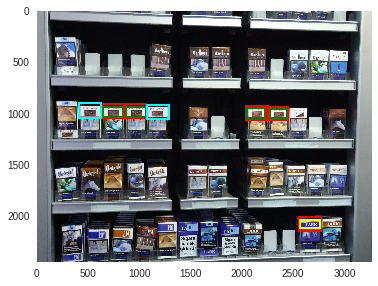

In [45]:
name ="C1_P11_N2_S4_1.JPG"
img = cv2.imread("./ShelfImages/"+name)
boxes = np.array(dpred_box[name],dtype='int')
pred = np.array(dclass_box[name],dtype='int')
true_boxes, true_class, true_box_area = true_utils(name)
pred_boxes, pred_class, pred_box_area = pred_util(pred, boxes,scale = 2)

fig, bx = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
bx.imshow(img)
bx.grid(False)

for n in range(0,len(true_boxes)):
  flag =0
  iou = compute_iou(np.array(true_boxes[n],dtype='int'), np.array(pred_boxes,dtype='int'), int(true_box_area[n]), np.array(pred_box_area,dtype='int'))
  pos = np.argmax(iou)
  if(iou[pos] > 0):
    if(true_class[n] == pred_class[pos]):
      print(iou[pos])
      i = np.array(true_boxes[n],dtype='int')
      rect = mpatches.Rectangle((i[0], i[1]), i[2]-i[0], i[3]-i[1], fill=False, edgecolor='red', linewidth=2)
      bx.add_patch(rect)

      i = np.array(pred_boxes[pos],dtype='int')
      rect = mpatches.Rectangle((i[0], i[1]), i[2]-i[0], i[3]-i[1], fill=False, edgecolor='green', linewidth=2)
      bx.add_patch(rect)
    else:
      print("Not matching class")
      print(iou[pos])
      i = np.array(true_boxes[n],dtype='int')
      rect = mpatches.Rectangle((i[0], i[1]), i[2]-i[0], i[3]-i[1], fill=False, edgecolor='red', linewidth=2)
      bx.add_patch(rect)

      i = np.array(pred_boxes[pos],dtype='int')
      rect = mpatches.Rectangle((i[0], i[1]), i[2]-i[0], i[3]-i[1], fill=False, edgecolor='yellow', linewidth=2)
      bx.add_patch(rect)
  else:
    i = np.array(true_boxes[n],dtype='int')
    rect = mpatches.Rectangle((i[0], i[1]), i[2]-i[0], i[3]-i[1], fill=False, edgecolor='cyan', linewidth=2)
    bx.add_patch(rect)

In [0]:
Tp = np.zeros((11,),dtype = 'int')
Fp = np.zeros((11,),dtype = 'int')
Fn = np.zeros((11,),dtype = 'int')
Tn = np.zeros((11,),dtype = 'int')

for i in test_list:
  name = i
  boxes = np.array(dpred_box[name],dtype='int')
  pred = np.array(dclass_box[name],dtype='int')
  true_boxes, true_class, true_box_area = true_utils(name)
  pred_boxes, pred_class, pred_box_area = pred_util(pred, boxes,scale = 2)

  if(len(true_class)==0):
    for n in range(0,len(pred_boxes)):
      class_num = pred_class[n]
      Tn[class_num] +=1 
  else:  
    gt_vector = np.ones((len(true_boxes)))
    for n in range(0,len(pred_boxes)):

      iou = compute_iou(np.array(pred_boxes[n],dtype='int'), np.array(true_boxes,dtype='int'), int(pred_box_area[n]), np.array(true_box_area,dtype='int'))
      pos = np.argmax(iou)
      if(iou[pos] > 0.5):
        # true positive
        if(true_class[pos] == pred_class[n]):
          if (gt_vector[pos] ==1):
            #true positive
            class_num = pred_class[n]
            Tp[class_num]+=1
          else:
            #False Positive
            class_num = pred_class[n]
            Fp[class_num]+=1

      else:
        # False positive
        if(true_class[pos] == pred_class[n]):
          class_num = pred_class[n]
          Fp[class_num]+=1
          
    for j in range(0,len(gt_vector)):
      if(gt_vector[j]==1):
        class_num = true_class[j]
        Fn[class_num] +=1 



In [61]:
print(Tp)
print(Fp)
print(Fn)

[  0  74 523  16 140  43  24  46  36  20  17]
[  0 317 186  13  35  31  26  28  21  10   8]
[  0 304 998  67 412 114 190 311 195  78  75]


In [64]:
AP = Tp[1:12]/(Fp[1:12]+Tp[1:12])
recall = Tp[1:12]/(Tp[1:12]+Fn[1:12])
print(AP)
print(recall)


print(np.mean(AP))
print(np.mean(recall))

[0.18925831 0.73765867 0.55172414 0.8        0.58108108 0.48
 0.62162162 0.63157895 0.66666667 0.68      ]
[0.1957672  0.34385273 0.19277108 0.25362319 0.27388535 0.11214953
 0.12885154 0.15584416 0.20408163 0.18478261]
0.5939589440878283
0.20456090178163228


In [2]:
 !pip install selectivesearch

  Running setup.py bdist_wheel for selectivesearch ... - done
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


In [0]:
def generate_testlabel(annotation,full_annotation, test_file):
    path = "./ShelfImages/"


    num = num+1
    name = test_file

    img = cv2.imread(path+name)

    if name in annotation.keys():

        box = annotation[name]
    else:
        box = []
    return 

def crop_image(name,img,box_list):
    #img = cv2.imread("../input/grocerydataset/grocerydataset_part1/ShelfImages/"+name)
    count=1
    for i in box_list:
        n = np.asarray(i,dtype=int)
        sample = img[n[1]:n[1]+n[3],n[0]:n[2]+n[0],:]
        label = np.zeros((sample.shape[0],sample.shape[1]), dtype = int)
        cv2.imwrite("./data/input/"+name[0:-4]+"_"+str(count)+".jpg",sample)
        cv2.imwrite("./data/label/"+name[0:-4]+"_"+str(count)+".png",label)
        count+=1
    return count



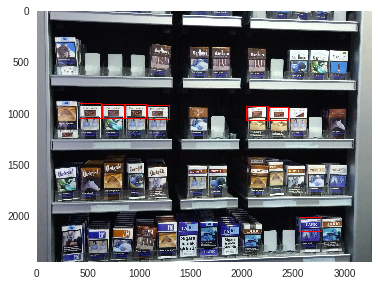

In [183]:
#np.array(annotation[test_list[105]],dtype='int')
box_t = annotation["C1_P11_N2_S4_1.JPG"]

fig, bx = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
bx.imshow(img)
bx.grid(False)
#new = boxes2[pred>0] 
for j in box_t:
    i = np.array(j[1:5], dtype='int')
    #boxes.append([x, y, x+w, y+h])
    #sample = img[i[1]:i[3],i[0]:i[2],:]
    #new_img = image_resize(sample,100,200)
    #inp_list.append(new_img)
    #label.append(0)

    rect = mpatches.Rectangle(
        (i[0], i[1]), i[2], i[3], fill=False, edgecolor='red', linewidth=1)
    bx.add_patch(rect)

In [0]:
def pred_util():
  pred_boxes = []
  pred_class = []
  pred_box_area = []
  count = 0
  for i in pred:
    if(i>0):
      new = boxes2[count]
      pred_box = np.zeros((4,),dtype='int')
      pred_class.append(i)
      pred_box=new
      pred_box_area.append((new[2]-new[0])*(new[3]-new[1]))
      pred_boxes.append(pred_box)
    count+=1

In [116]:
print(pred_boxes[0])
print(pred_class[0])
print(box_area[0])

[ 154 1824  321 1906]
1
13694


In [0]:
def true_utils(name):
  box_t = annotation[name]

  true_boxes = []
  true_class = []
  true_box_area = []
  count = 0
  for i in box_t:

      new = np.array(i[1:5],dtype='int')
      true_box = np.zeros((4,),dtype='int')
      true_class.append(int(i[0]))
      true_box=[new[0],new[1],new[0]+new[2],new[1]+new[3]]
      true_box_area.append((new[2])*(new[3]))
      true_boxes.append(true_box)
      count+=1
return true_boxes,true_class,true_box_area

In [122]:
print(true_boxes[0])
print(true_class[0])
print(true_box_area[0])

[1432, 908, 1664, 1089]
1
41992


In [0]:
def compute_iou(box, boxes, box_area, boxes_area):
    """Calculates IoU of the given box with the array of the given boxes.
    box: 1D vector [y1, x1, y2, x2]
    boxes: [boxes_count, (y1, x1, y2, x2)]
    box_area: float. the area of 'box'
    boxes_area: array of length boxes_count.
    Note: the areas are passed in rather than calculated here for
    efficiency. Calculate once in the caller to avoid duplicate work.
    """
    # Calculate intersection areas
    y1 = np.maximum(box[0], boxes[:, 0])
    y2 = np.minimum(box[2], boxes[:, 2])
    x1 = np.maximum(box[1], boxes[:, 1])
    x2 = np.minimum(box[3], boxes[:, 3])
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    union = box_area + boxes_area[:] - intersection[:]
    iou = intersection / union
    return iou

0.48345814769172435
0.5538140020898642
0.3986415882967607
0.431478578892372
0.33655071935895103
0.5747126436781609


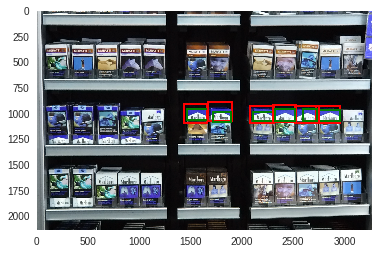

In [132]:
fig, bx = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
bx.imshow(img)
bx.grid(False)

for n in range(0,len(true_boxes)):
  iou = compute_iou(np.array(true_boxes[n],dtype='int'), np.array(pred_boxes,dtype='int'), int(true_box_area[n]), np.array(pred_box_area,dtype='int'))
  pos = np.argmax(iou)
  print(iou[pos])
  i = np.array(true_boxes[n],dtype='int')
  rect = mpatches.Rectangle((i[0], i[1]), i[2]-i[0], i[3]-i[1], fill=False, edgecolor='red', linewidth=2)
  bx.add_patch(rect)
  
  i = np.array(pred_boxes[pos],dtype='int')
  rect = mpatches.Rectangle((i[0], i[1]), i[2]-i[0], i[3]-i[1], fill=False, edgecolor='green', linewidth=2)
  bx.add_patch(rect)
  
  

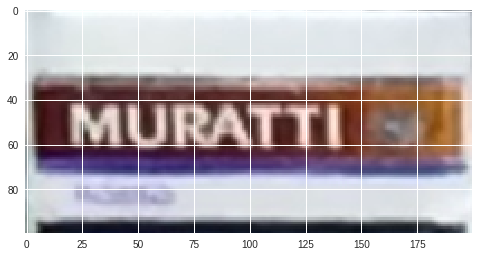

In [143]:
plt.imshow(X_test[121])
plt.show()

In [0]:
candidates = set()
for r in regions:
        # excluding same rectangle (with different segments)
        if r['rect'] in candidates:
            continue
        # excluding regions smaller than 2000 pixels
        if r['size'] < 2000 or r['size'] > 3500:
            continue
        
        # distorted rects
        x, y, w, h = r['rect']
        #if w < 20 or h < 20:
            #continue
        #if w / h > 1 or h / w > 1:
            #continue
        candidates.add(r['rect'])

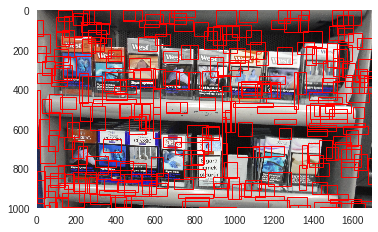

In [41]:

import matplotlib.patches as mpatches

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(im_2)
ax.grid(False)
boxes = []
for x, y, w, h in candidates:
    boxes.append([x, y, x+w, y+h])
    rect = mpatches.Rectangle(
        (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)


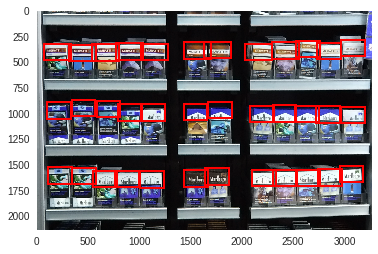

In [146]:
test_boxes = full_dictionary[test_list[105]]
fig, bx = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
bx.imshow(img)
bx.grid(False)

for i in test_boxes:
  new = np.array(i, dtype='int')
  rect = mpatches.Rectangle((new[0], new[1]), new[2], 160, fill=False, edgecolor='red', linewidth=2)
  bx.add_patch(rect)


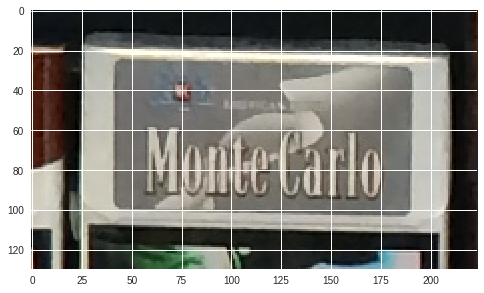

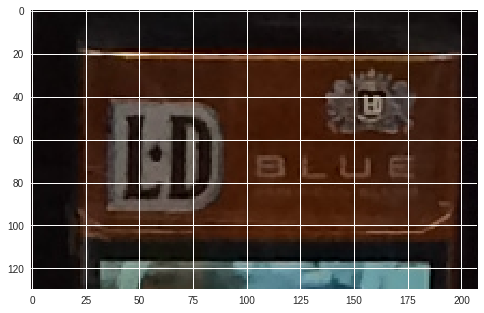

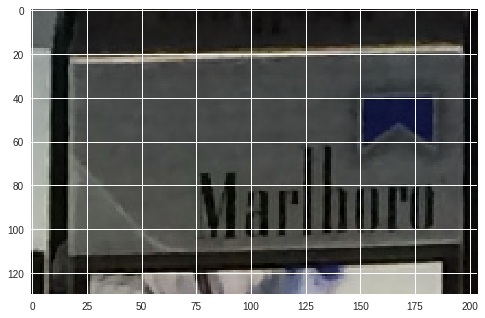

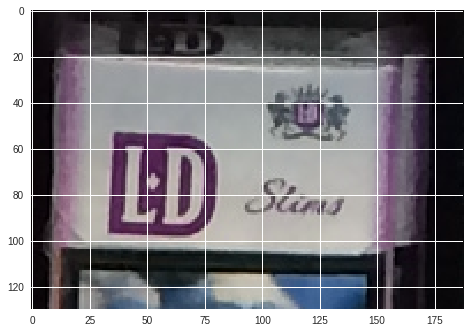

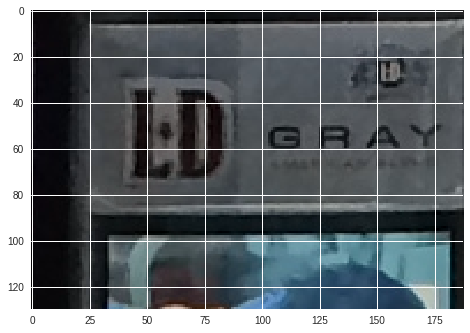

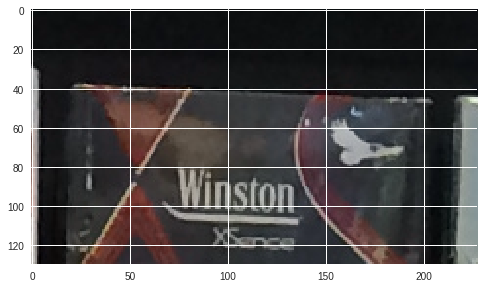

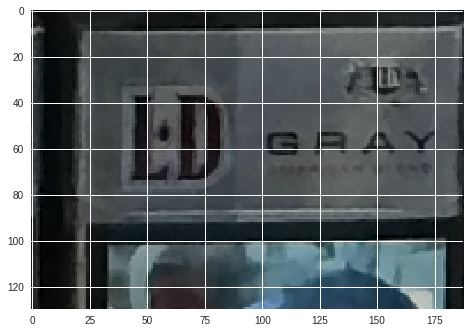

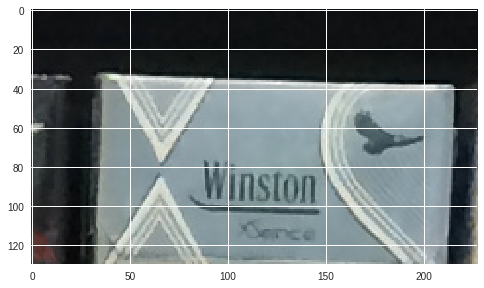

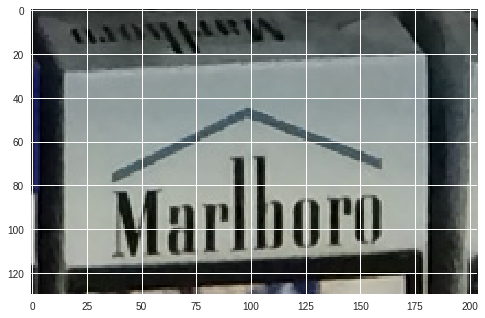

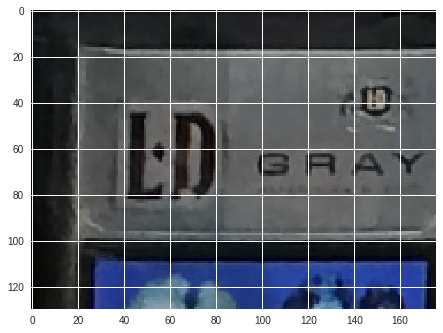

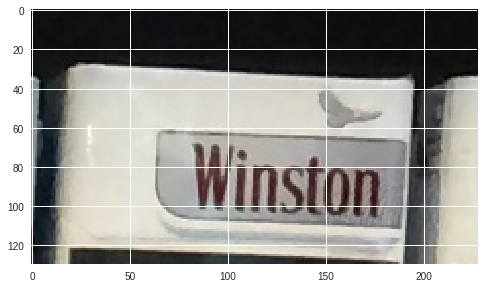

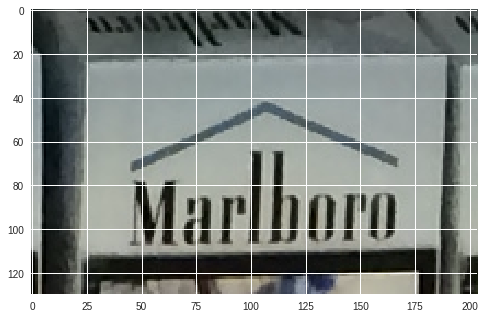

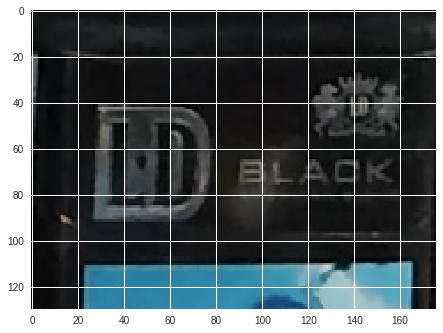

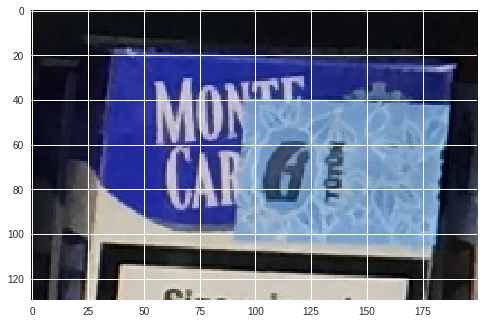

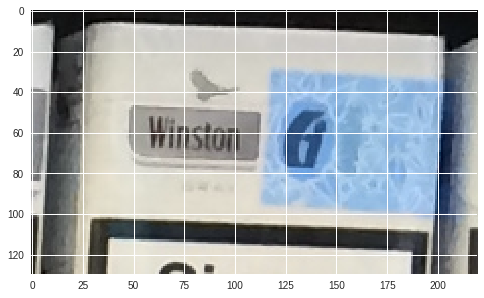

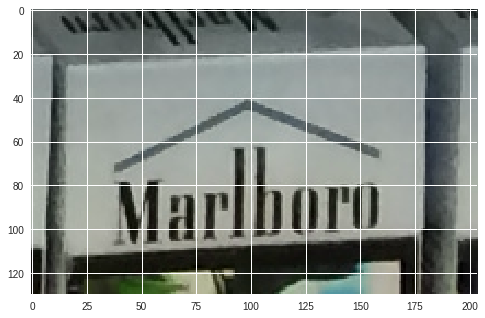

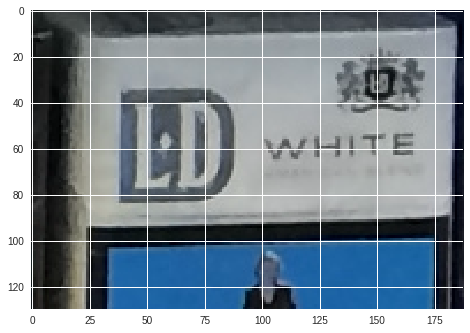

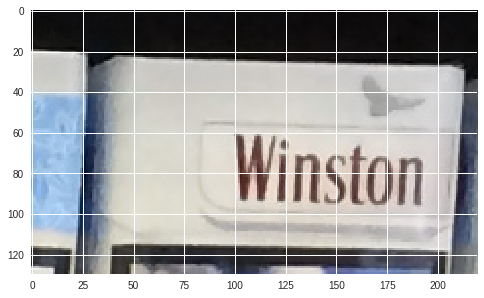

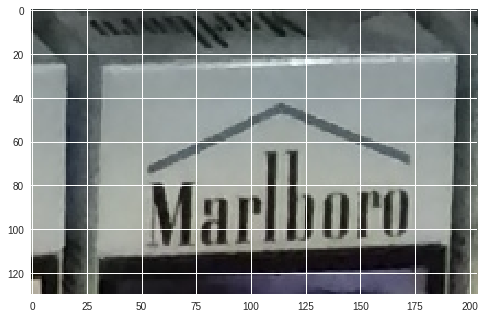

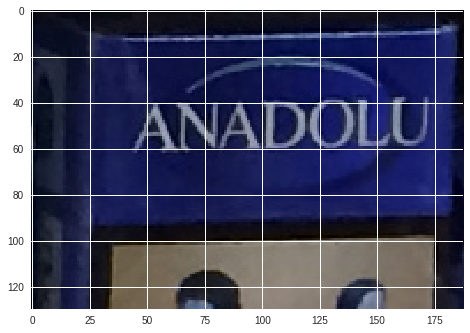

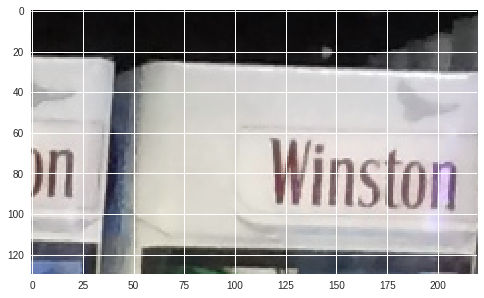

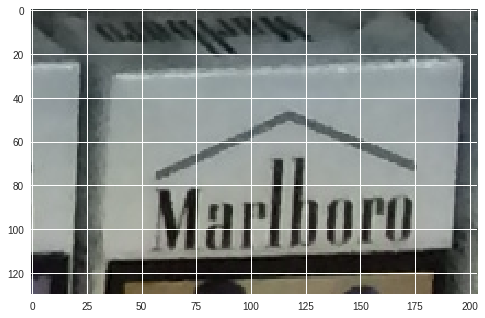

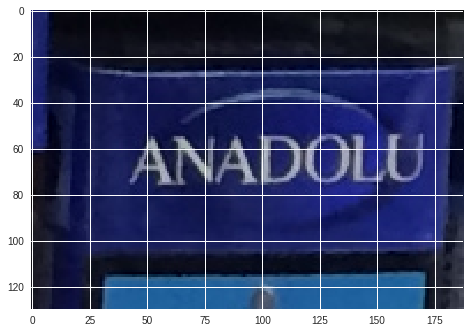

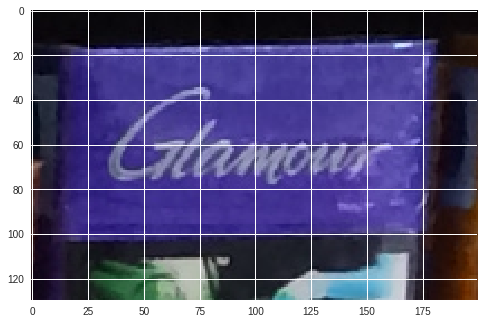

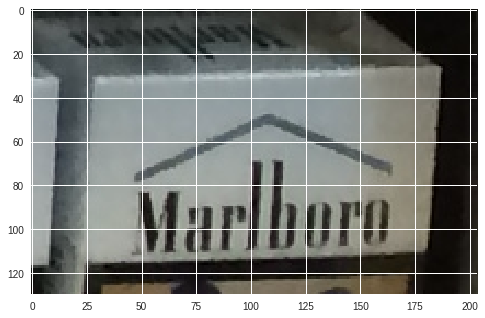

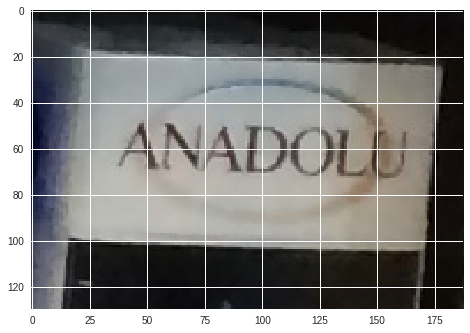

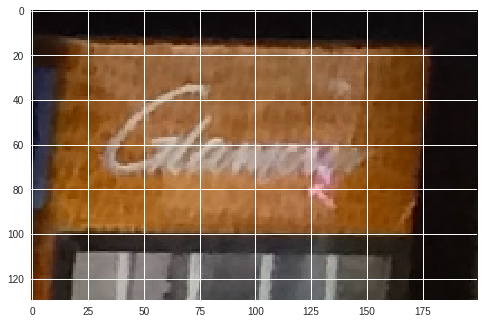

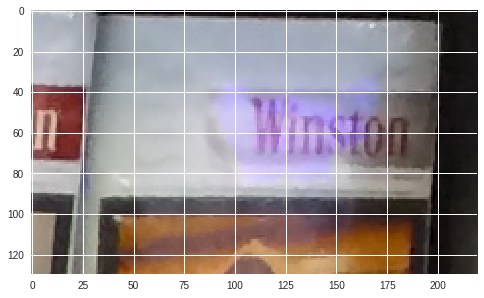

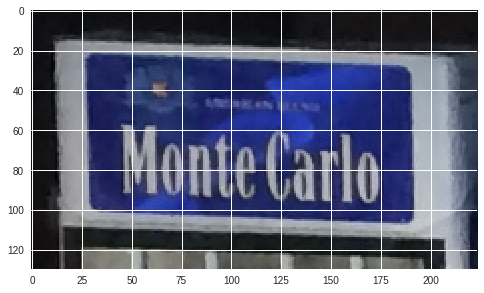

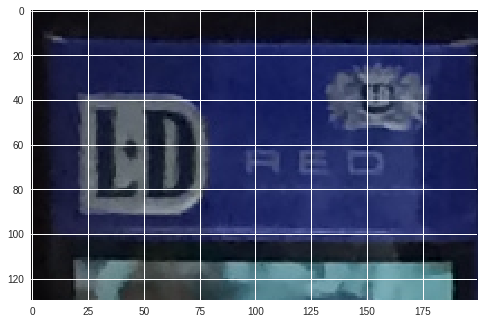

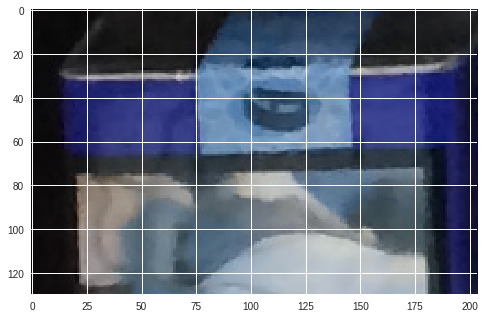

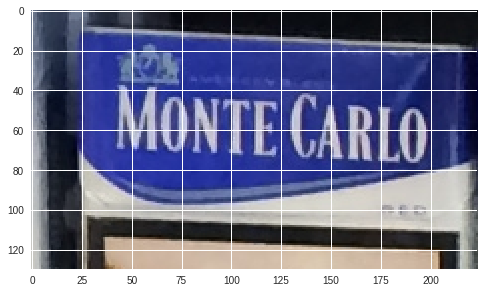

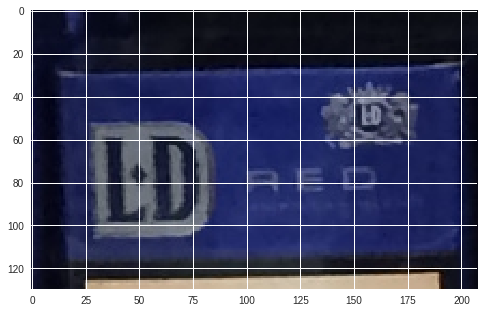

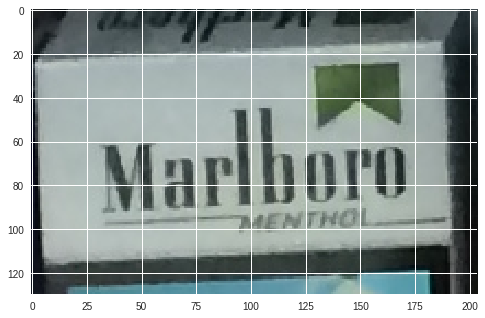

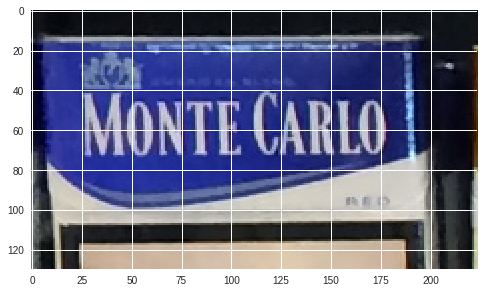

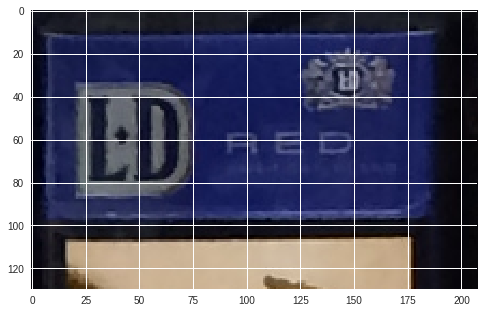

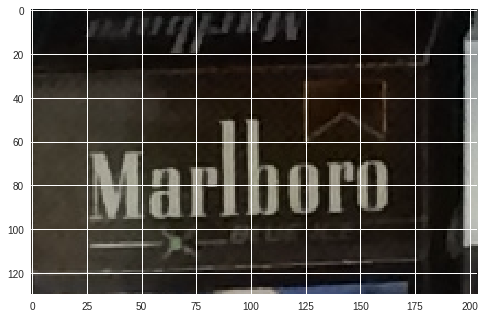

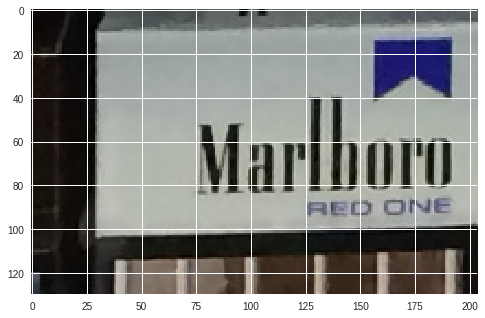

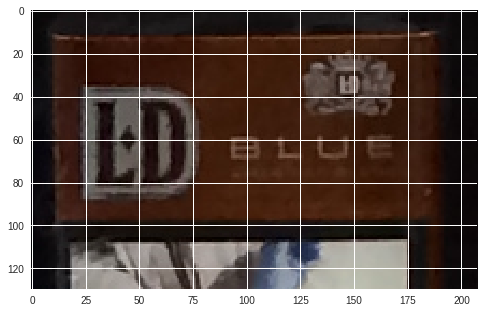

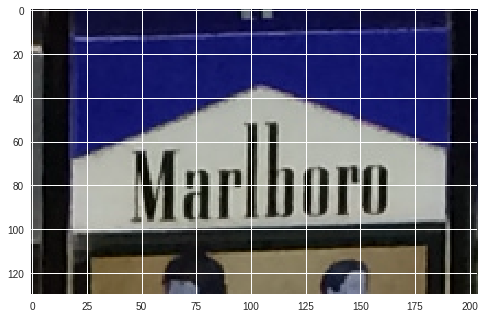

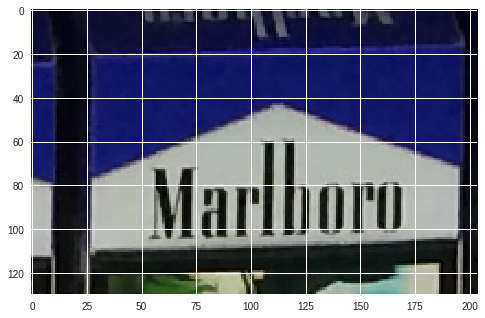

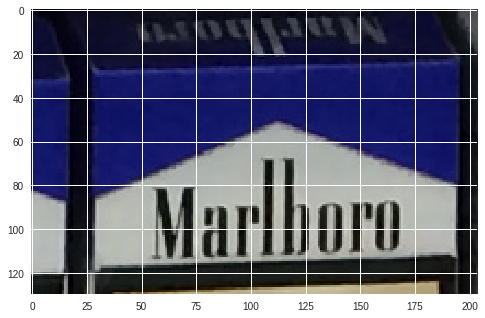

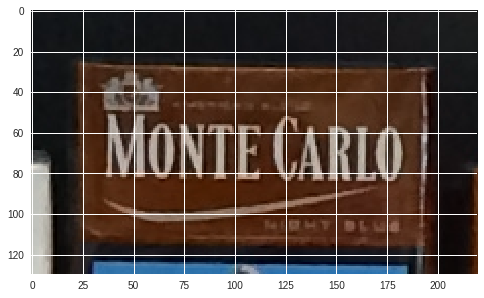

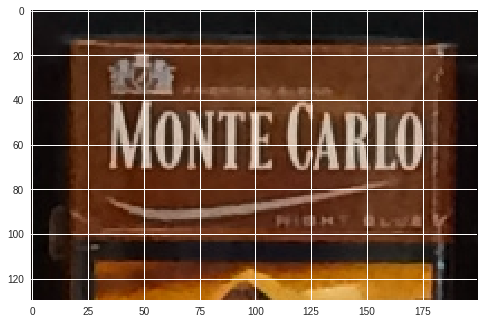

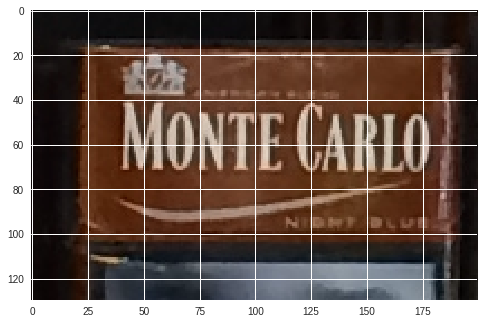

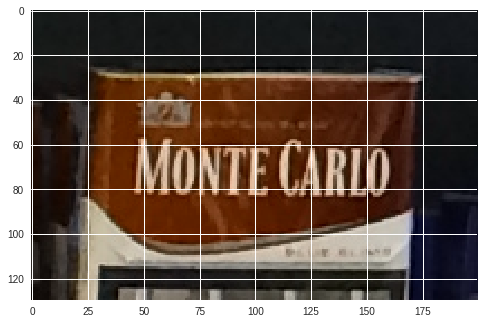

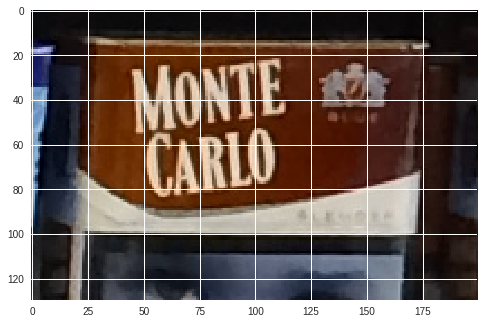

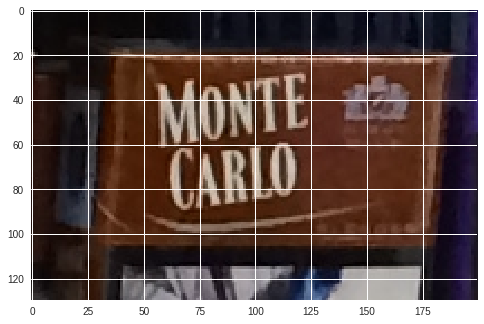

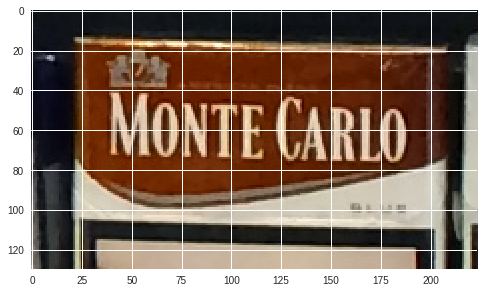

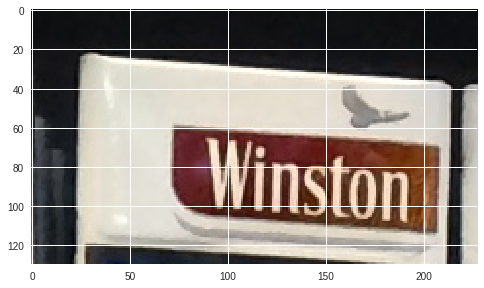

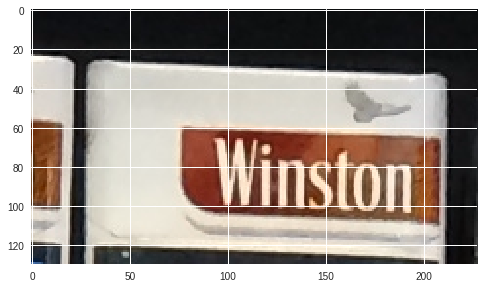

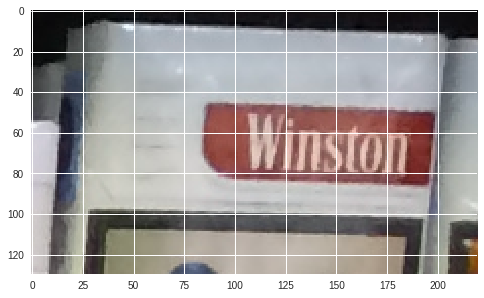

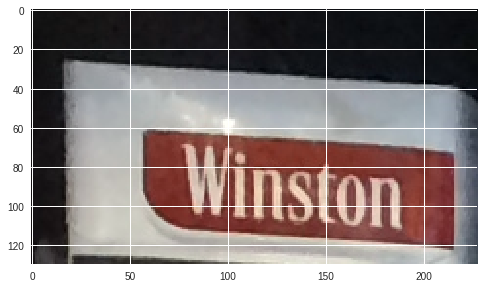

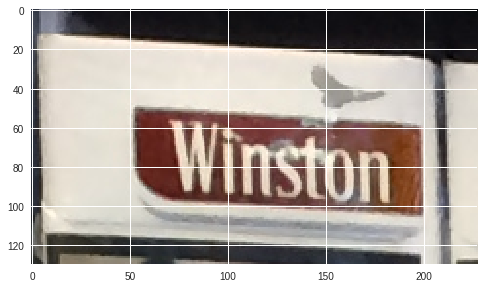

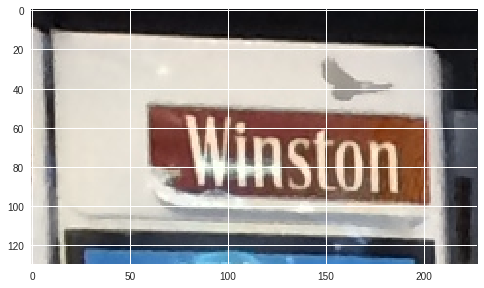

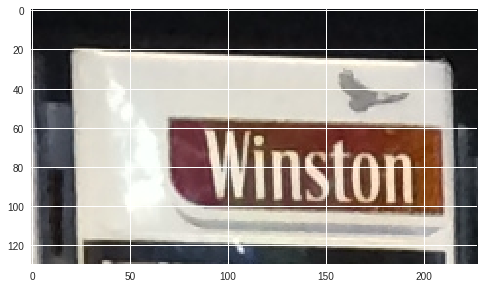

In [155]:

img_106 = cv2.imread("./ShelfImages/"+test_list[140])
def crop_image_full(img,box_list):
  for i in box_list:
        n = np.asarray(i,dtype=int)
        sample = img[n[1]:n[1]+130,n[0]:n[2]+n[0],:]
        label = int(i[4]) 
        plt.imshow(sample)
        plt.show()
    #return count
    
crop_image_full(img_106,full_dictionary[test_list[140]])    

In [150]:
annotation[test_list[106]]

[['4', '1048', '88', '168', '102'],
 ['4', '888', '92', '168', '102'],
 ['4', '1212', '80', '168', '102'],
 ['4', '736', '88', '168', '102'],
 ['4', '576', '84', '168', '102']]

In [0]:
import numpy as np

In [0]:

boxes = np.array(boxes)
x1 = boxes[:,0]
y1 = boxes[:,1]
x2 = boxes[:,2]
y2 = boxes[:,3]

# compute the area of the bounding boxes and sort the bounding
# boxes by the bottom-right y-coordinate of the bounding box
area = (x2 - x1 + 1) * (y2 - y1 + 1)
idxs = np.argsort(y2)

In [0]:
pick = []
while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)
 
		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])
 
		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)
 
		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
 
		# delete all indexes from the index list that have
		idxs = np.delete(idxs, np.concatenate(([last],np.where(overlap > 0.5)[0])))

In [46]:
len(boxes[pick])

1044

In [47]:
ls

annotation.txt           ProductImages/             ShelfImages/  wget-log.2
BrandImages/             ProductImagesFromShelves/  wget-log
BrandImagesFromShelves/  sample_data/               wget-log.1
